In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os
import math as mt

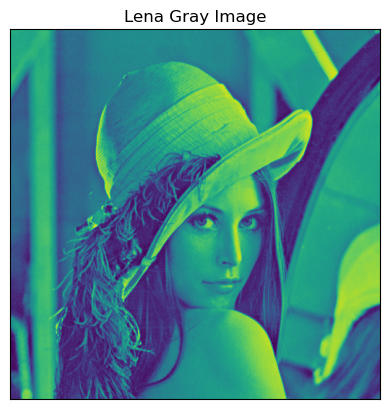

In [2]:
im_gray = cv.imread("image2\lena.tiff",0)
plt.imshow(im_gray)
plt.xticks([])
plt.yticks([])
plt.title("Lena Gray Image")
plt.show()

In [3]:
def imageEntropy(p):
    h = 0.0
    for i in range(256):
        h = h + p[i]*mt.log2(p[i]+ 1e-10)
    h = -h
    return h

In [4]:
imvector = list(im_gray.ravel())
ints = [x for x in range(256)]

In [5]:
norm = []
for x in ints:
    norm.append(imvector.count(x))

In [6]:
norm1 = []
for i in range(256):
    norm1.append(norm[i]/(512*512))


In [7]:
lenaEntropy = imageEntropy(norm1)


In [8]:
lenaEntropy

7.445040459024629

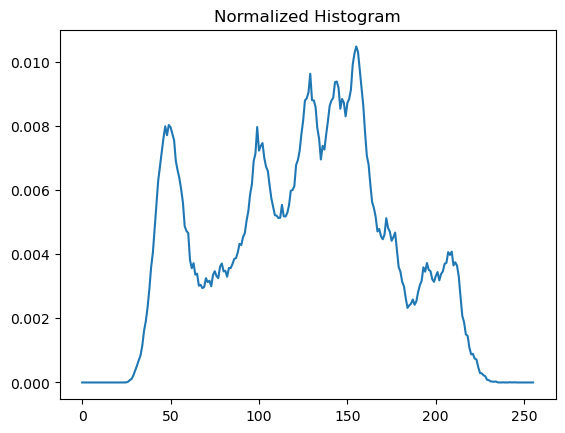

In [9]:
plt.plot(ints, norm1)  #ints=x-axis values (pixel intensities) and norm1=y-axis values (normalized frequencies)
plt.title("Normalized Histogram")
plt.show()

In [10]:
image_directory = 'image2'
image_list = []

In [19]:
def calculate_entropy(im_gray):
    imvector = list(im_gray.ravel())
    ints = [x for x in range(256)]
    norm = []
    for x in ints:
        norm.append(imvector.count(x))
    norm1 = []
    for i in range(256):
        norm1.append(norm[i]/(512*512))
    return imageEntropy(norm1)

In [20]:
# img = cv.imread("image\lena.tiff")

In [21]:
#import cv2
for filename in os.listdir(image_directory):
    image_path = os.path.join(image_directory, filename)
    img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
    
    entropy_value = calculate_entropy(img)
    image_list.append((filename, entropy_value))

In [22]:
sorted_image_list = sorted(image_list, key=lambda x: x[1])


In [23]:
for filename, entropy in sorted_image_list:
    print(f'Image: {filename}, Entropy: {entropy}')

Image: 71.tiff, Entropy: 1.3352816786286812
Image: airplane.tiff, Entropy: 1.3352816786286812
Image: baboon.tiff, Entropy: 1.3352816786286812
Image: lena.tiff, Entropy: 1.3352816786286812
Image: peeper.tiff, Entropy: 1.3352816786286812
Image: sailboat.tiff, Entropy: 1.3352816786286812
Image: splash.tiff, Entropy: 1.3352816786286812
Image: 71.tiff, Entropy: 2.370493115814662
Image: airplane.tiff, Entropy: 6.702443895499921
Image: splash.tiff, Entropy: 7.253402621764626
Image: baboon.tiff, Entropy: 7.358314783907414
Image: lena.tiff, Entropy: 7.445040459024629
Image: sailboat.tiff, Entropy: 7.484290876654413
Image: peeper.tiff, Entropy: 7.593600856097997


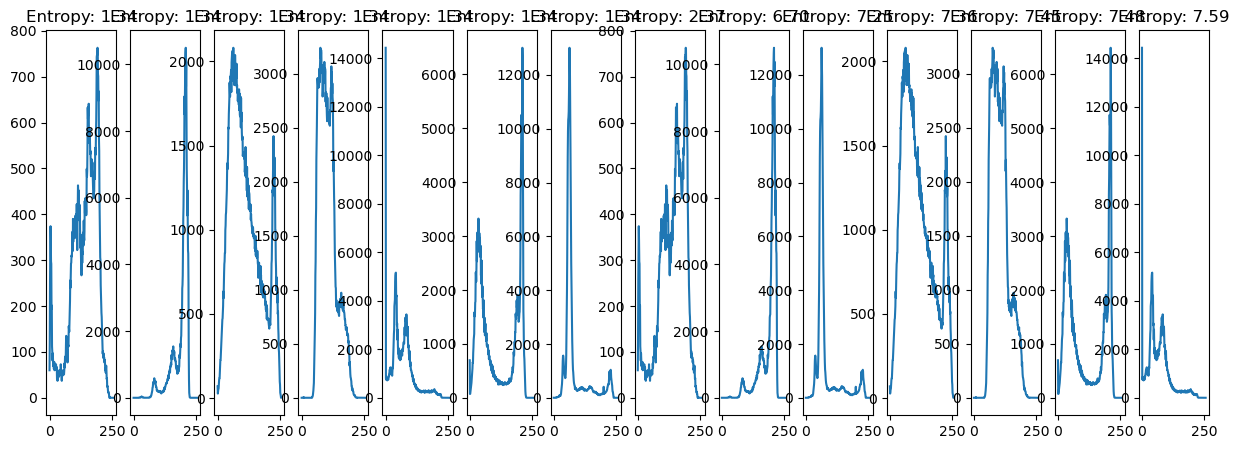

In [24]:
fig, axes = plt.subplots(1, len(sorted_image_list), figsize=(15, 5))

for i, (filename, entropy) in enumerate(sorted_image_list):
    image_path = os.path.join(image_directory, filename)
    img = cv.imread(image_path)
    hist = cv.calcHist([img], [0], None, [256], [0, 256])
    axes[i].plot(hist)
    axes[i].axis()
    axes[i].set_title(f'Entropy: {entropy:.2f}')

plt.show()

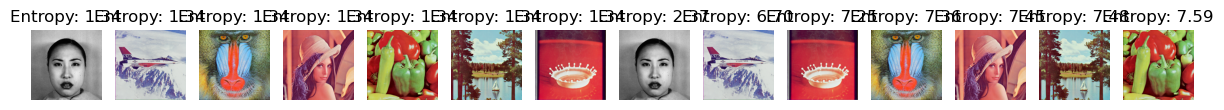

In [25]:
fig, axes = plt.subplots(1, len(sorted_image_list), figsize=(15, 5))

for i, (filename, entropy) in enumerate(sorted_image_list):
    image_path = os.path.join(image_directory, filename)
    img = cv.imread(image_path)
    axes[i].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    axes[i].axis('off')
    axes[i].set_title(f'Entropy: {entropy:.2f}')

plt.show()